In [1]:
import numpy as np
import keras
import random
from keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import random
import cv2
from scipy import ndimage

In [2]:
path = "D:/downloads/train/"
path_seis = os.path.join(path,'seis')
path_fault = os.path.join(path,'fault')
seis_names = os.listdir(path_seis)
fault_names = os.listdir(path_fault)

In [3]:
# gx  = np.fromfile(self.dpath+str(data_IDs_temp[0])+'.dat',dtype=np.single)
# fx  = np.fromfile(self.fpath+str(data_IDs_temp[0])+'.dat',dtype=np.single)
X =[]
Y = []
for i in range(len(seis_names)):
    seis_cube = np.fromfile(os.path.join(path_seis, seis_names[i]),dtype=np.single)
    faults = np.fromfile(os.path.join(path_fault, fault_names[i]),dtype=np.single)
    #print(seis_cube)
    dim = (128,128,128)
    seis_cube = np.reshape(seis_cube, dim)
    fault = np.reshape(faults, dim)
    seis_m = np.mean(seis_cube)
    seis_sigma = np.std(seis_cube)
    seis_cube_norm = (seis_cube-seis_m)/seis_sigma
    x = np.reshape(seis_cube_norm,(1,128,128,128,1))
    y =  np.reshape(fault,(1,128,128,128,1))
    #seis_cube_norm = np.transpose(seis_cube_norm)
    #fault = np.transpose(fault)
    
    for k in range(128):
        X.append(np.transpose(x[0,k,:,:,0]))
        X.append(np.transpose(x[0,:,k,:,0]))
        Y.append(np.transpose(y[0,k,:,:,0]))
        Y.append(np.transpose(y[0,:,k,:,0]))
        
#     X = np.zeros((2, *self.dim, self.n_channels),dtype=np.single)
#     Y = np.zeros((2, *self.dim, self.n_channels),dtype=np.single)
#     X[i,] = np.reshape(gx, (*self.dim,self.n_channels))
#     Y[i,] = np.reshape(fx, (*self.dim,self.n_channels))  
#     X[i+,] = np.reshape(np.flipud(gx), (*self.dim,self.n_channels))
#     Y[1,] = np.reshape(np.flipud(fx), (*self.dim,self.n_channels)) 
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(51200, 128, 128)
(51200, 128, 128)


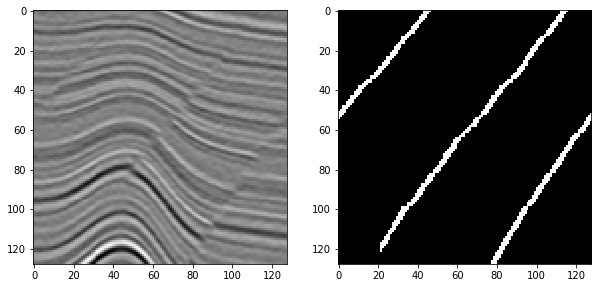

In [4]:
seis_cube = np.fromfile(os.path.join(path_seis, seis_names[0]),dtype=np.single)
faults = np.fromfile(os.path.join(path_fault, fault_names[0]),dtype=np.single)
dim = (128,128,128)
seis_cube = np.reshape(seis_cube, dim)
fault = np.reshape(faults, dim)
seis_m = np.mean(seis_cube)
seis_sigma = np.std(seis_cube)
seis_cube_norm = (seis_cube-seis_m)/seis_sigma
x = np.reshape(seis_cube_norm,(1,128,128,128,1))
#y = np.transpose(fault)
y = np.reshape(fault,(1,128,128,128,1))
fig = plt.figure(figsize=(10,10))
#inline slice
k1 = 10
plt.subplot(1, 2, 1)
imgplot1 = plt.imshow(np.transpose(x[0,k1,:,:,0]),interpolation='nearest',aspect=1,cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
imgplot2 = plt.imshow(np.transpose(y[0,k1,:,:,0]),interpolation='nearest',aspect=1,cmap=plt.cm.gray)
#xline slice
# k2 = 0
# plt.subplot(1, 3, 2)
# imgplot1 = plt.imshow(np.transpose(x[0,:,k2,:,0]),cmap=plt.cm.gray,interpolation='nearest',aspect=1)


# #time slice
# k3 = 60
# plt.subplot(1, 3, 3)
# imgplot1 = plt.imshow(np.transpose(x[0,:,:,k3,0]),cmap=plt.cm.gray,interpolation='nearest',aspect=1)

In [5]:
#plt.figure
#plt.imshow(np.transpose(X[0]),interpolation='nearest',aspect=1,cmap=plt.cm.gray)
pairs = [[X[i], Y[i]] for i in range(250)]

In [6]:
def rotation(pair,angle):
    #print("rotation at angle ",angle)
    pair[0] = ndimage.rotate(pair[0], angle) 
    pair[1] = ndimage.rotate(pair[1], angle)
    pair[0] = cv2.resize(pair[0],(128,128))
    pair[1] = cv2.resize(pair[1],(128,128))
    #pair[1] = pair[1].reshape((128,128))
    return pair

def blur(pair):
    kernel = (random.randint(1,10), random.randint(1,5))
    #print('Blurring with kernel sizes: ', kernel)
    pair[0] = cv2.blur(pair[0], kernel)
    pair[1] = cv2.blur(pair[1], kernel)
    pair[0] = cv2.resize(pair[0],(128,128))
    pair[1] = cv2.resize(pair[1],(128,128))
    return pair

def flip(pair):
    flip = random.randint(-1,1)
    #print('Reflection at direction', flip)
    pair[0] = cv2.flip(pair[0], flip)
    pair[1] = cv2.flip(pair[1], flip)
    pair[0] = cv2.resize(pair[0],(128,128))
    pair[1] = cv2.resize(pair[1],(128,128))
    return pair
    
def augmentations(pair, type_of_augmentation):
    cases = {
        '1': lambda pair: rotation(pair, random.randrange(0,360)),
        '2': lambda pair: blur(pair),
        '3': lambda pair: flip(pair)
    }
    result = cases[str(type_of_augmentation)]
    return result(pair)



In [7]:
x_augmented = pairs
for i, pair in enumerate(pairs):
    x_augmented[i] = augmentations(pair, random.randint(1,3))
    #i = i + 1
x_augmented = np.array(x_augmented)
# np.append(x_train_augmented,x_train)   
# np.append(y_train,y_train)
#print(X.shape, x_augmented[0].shape)
X = np.append(X, x_augmented[:,0],axis=0)
Y = np.append(Y, x_augmented[:,1],axis=0)

In [8]:
# np.append(y_train,y_train)
print(X.shape, x_augmented[1,0].shape)
print(X[0].shape)

(51450, 128, 128) (128, 128)
(128, 128)
